# Types of data
In statistics, data types define the kind of data you are working with and how you can analyze it. Understanding data types is fundamental for selecting the appropriate analysis methods and visualizations.

1. Categorical Data
Categorical data represents categories or groups. It can be further divided into:

a. Nominal
Represents categories without any specific order.
Examples: Colors (Red, Blue, Green), Gender (Male, Female, Other), Cities (Nagpur, Mumbai).

b. Ordinal
Represents categories with a meaningful order or ranking.
Examples: Education Levels (High School, Bachelor’s, Master’s), Ratings (Poor, Average, Good, Excellent).

2. Numerical Data
Numerical data represents numbers. It can be further divided into:

a. Discrete
Represents countable, distinct values (integers).
Examples: Number of students in a class, Number of cars in a parking lot.

b. Continuous
Represents measurable quantities with infinite possible values within a range.
Examples: Height, Weight, Temperature.

# Code Example 1: Create and Identify Data Types

In [64]:
import pandas as pd

#Sample Data
data = {
    "City":["Nagpur","Mumbai","Delhi"],    #Nominal
    "Education":['High School','Bachelor','Master'],   #Ordinal
    'Students':[120,200,150],     #Discrete
    'Temperature':[35.6,32.8,30.5]    # Continuous
}

# Create  a DataFrame
df = pd.DataFrame(data)

#Display DataFrame
print("Sample DataFrame:")
print(df)

#Check Data Types
print("\n Data Tpyes of Each Columns:")
print(df.dtypes)

Sample DataFrame:
     City    Education  Students  Temperature
0  Nagpur  High School       120         35.6
1  Mumbai     Bachelor       200         32.8
2   Delhi       Master       150         30.5

 Data Tpyes of Each Columns:
City            object
Education       object
Students         int64
Temperature    float64
dtype: object


# Code Example 2: Handle Categorical Data
For categorical data, encoding may be required to convert it into numeric form for machine learning models.

In [67]:
from sklearn.preprocessing  import LabelEncoder

#Encoding Nominal Data
le = LabelEncoder()
df['City_Encoded']=le.fit_transform(df['City'])

#Encoding Ordinal Data(Education levels)
education_order = {'High School':0,'Bachelor':1,'Master':2}
df['Education_Encoded'] = df['Education'].map(education_order)

print('\nDataFrame after Encoding:')
print(df)


DataFrame after Encoding:
     City    Education  Students  Temperature  City_Encoded  Education_Encoded
0  Nagpur  High School       120         35.6             2                  0
1  Mumbai     Bachelor       200         32.8             1                  1
2   Delhi       Master       150         30.5             0                  2


# Code Example 3: Plot Numerical and Categorical Data
Visualize the data for better understanding.

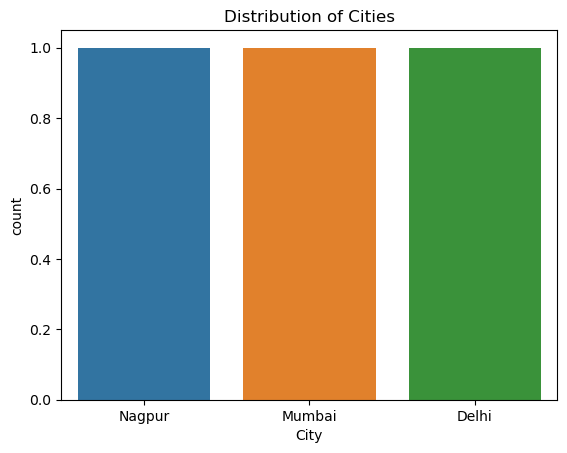

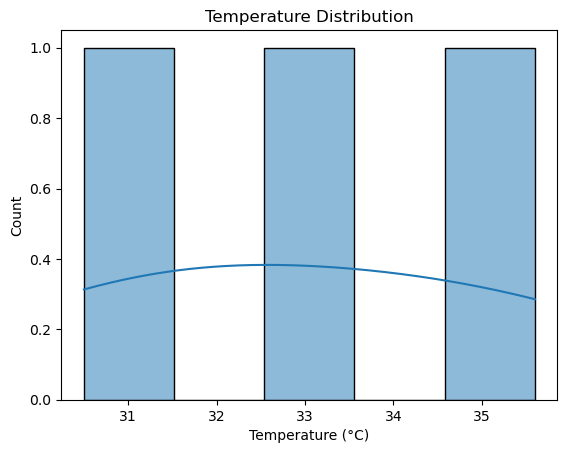

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Nominal Data(City)
sns.countplot(x='City',data = df)
plt.title('Distribution of Cities')
plt.show()

# Plot Continuous Data(Temperature)
sns.histplot(df['Temperature'],bins=5,kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

# Advanced Handling of Categorical Data
# 1. One-Hot Encoding
When nominal data has multiple categories, One-Hot Encoding creates binary columns for each category.

Code Example: One-Hot Encoding

In [73]:
import pandas as pd

#Sample Data
data = {
    "City":["Nagpur","Mumbai","Delhi"],    #Nominal
    "Education":['High School','Bachelor','Master'],   #Ordinal
    'Students':[120,200,150],     #Discrete
    'Temperature':[35.6,32.8,30.5]    # Continuous
}

# Create  a DataFrame
df = pd.DataFrame(data)

#Display DataFrame
print("Sample DataFrame:")
print(df)

# One - Hot Encoding Nominal Data(City)
df_encoded = pd.get_dummies(df,columns=['City'],drop_first=False)

print('\nDataFrame after One-Hot Encoding:')
print(df_encoded)

Sample DataFrame:
     City    Education  Students  Temperature
0  Nagpur  High School       120         35.6
1  Mumbai     Bachelor       200         32.8
2   Delhi       Master       150         30.5

DataFrame after One-Hot Encoding:
     Education  Students  Temperature  City_Delhi  City_Mumbai  City_Nagpur
0  High School       120         35.6       False        False         True
1     Bachelor       200         32.8       False         True        False
2       Master       150         30.5        True        False        False


# 2. Encoding High Cardinality Data

For categorical variables with many unique values (e.g., ZIP codes, product IDs), encoding them can lead to a high-dimensional dataset.

Solution: Target Encoding

In [79]:
# Simulating a target variable 
 # example 
import pandas as pd

#Sample Data
data = {
    "City":["Nagpur","Mumbai","Delhi"],    #Nominal
    "Education":['High School','Bachelor','Master'],   #Ordinal
    'Students':[120,200,150],     #Discrete
    'Temperature':[35.6,32.8,30.5] ,   # Continuous 
    'Sales':[300,400,500]
}

# Create  a DataFrame
df = pd.DataFrame(data)

#Display DataFrame
print("Sample DataFrame:")
print(df)
# Target Encoding for City
city_target_mean = df.groupby('City')['Sales'].mean()
df['City_Target_Encoded']=df['City'].map(city_target_mean)

print('\nDataFrame after Target Encoding:')
print(df[['City','City_Target_Encoded']])

Sample DataFrame:
     City    Education  Students  Temperature  Sales
0  Nagpur  High School       120         35.6    300
1  Mumbai     Bachelor       200         32.8    400
2   Delhi       Master       150         30.5    500

DataFrame after Target Encoding:
     City  City_Target_Encoded
0  Nagpur                300.0
1  Mumbai                400.0
2   Delhi                500.0


# Advanced Handling of Numerical Data


# 1. Scaling and Normalization
Numerical data often needs to be scaled to bring all features into a similar range, especially for machine learning.

Standardization
Transforms data to have a mean of 0 and a standard deviation of 1.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Temperature_Scaled'] = scaler.fit_transform(df[['Temperature']])

print('\nDataframe after Standardization:')
print(df[['Temperature','Temperature_Scaled']])


Dataframe after Standardization:
   Temperature  Temperature_Scaled
0         35.6            1.262748
1         32.8           -0.079921
2         30.5           -1.182827


Normalization
Scales data to a range of [0, 1].

In [86]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df["Temperature_Normalized"] = min_max_scaler.fit_transform(df[['Temperature']])

print('\nDataFrame after Normalization')
print(df[['Temperature','Temperature_Normalized']])


DataFrame after Normalization
   Temperature  Temperature_Normalized
0         35.6                 1.00000
1         32.8                 0.45098
2         30.5                 0.00000


# 2. Handling Missing Values
Missing data can skew analysis and models. Strategies include:

Imputation: Replace missing values with a statistic (mean, median, or mode).
Dropping Rows/Columns: When missing data is too high.

Code Example: Imputation

In [92]:
import numpy as np

#Introduce Missing Value
df.loc[1,'Temperature'] = np.nan

#Impute Missing values with Median
df['Temperature_Imputed'] = df['Temperature'].fillna(df['Temperature'].median())

print('\nDataFrame after Handling Missing Values:')
print(df[['Temperature','Temperature_Imputed']])


DataFrame after Handling Missing Values:
   Temperature  Temperature_Imputed
0         35.6                35.60
1          NaN                33.05
2         30.5                30.50


# Advanced Visualizations
# 1. Pairwise Relationships (Numerical vs. Numerical)
Visualize relationships between numerical variables using pairplot.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df,diag_kind='kde')
plt.suptitle('Pairwise Relationships',y=1.02)
plt.show()

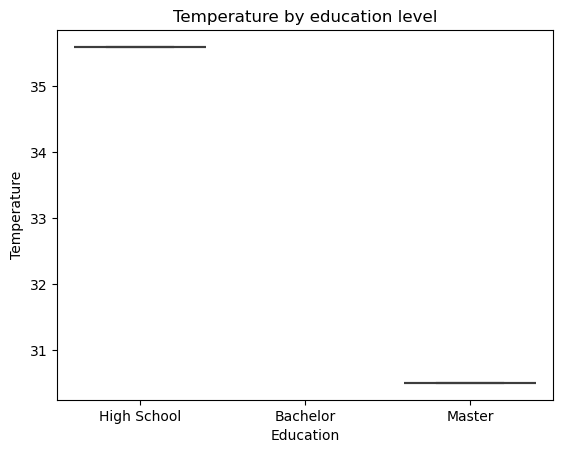

In [95]:
sns.boxplot(x='Education',y='Temperature',data=df)
plt.title('Temperature by education level')
plt.show()